# Dataset example

In [1]:
import os
import nanotune as nt
from qcodes.dataset.plotting import plot_by_id
from nanotune.data.plotting import plot_dataset

Logging hadn't been started.
Activating auto-logging. Current session state plus future input saved.
Filename       : /Users/jana/.qcodes/logs/command_history.log
Mode           : append
Output logging : True
Raw input log  : False
Timestamping   : True
State          : active
Qcodes Logfile : /Users/jana/.qcodes/logs/210816-14776-qcodes.log


In [2]:
nt_root = os.path.dirname(os.path.dirname(os.path.abspath(nt.__file__)))
db_pinchoff = os.path.join('data', 'tuning', 'device_characterization.db')

Load data measured with QCoDeS into a nanotune dataset

In [3]:
ds = nt.Dataset(1203, db_pinchoff, db_folder=nt_root)

It load tuning-related metadata into the dataset's attributes. Some of the important ones are normalization constants and readout methods used.

In [4]:
print(f"device_name: {ds.device_name}")
print(f"nornalization constants: {ds.normalization_constants}")
print(f"readout methods: {ds.readout_methods}")

device_name: GB_Newtown_Dev_3_1
nornalization constants: {'transport': [0, 2.4444886949e-09], 'rf': [0, 1], 'sensing': [0, 1]}
readout methods: {'transport': 'sr860_2_R_current'}


Normalized data with renamed xarray variables

In [5]:
ds.data

<xarray.Dataset>
Dimensions:    (voltage_x: 35)
Coordinates:
  * voltage_x  (voltage_x) float64 -0.3411 -0.3311 -0.3211 ... -0.01003 0.0
Data variables:
    transport  (voltage_x) float64 0.0005913 0.001765 0.001986 ... 0.9969 0.9955
Attributes: (12/26)
    ds_name:                  results
    sample_name:              GB_Newtown
    exp_name:                 GB_Newtown_Dev_3_2
    snapshot:                 {"station": {"instruments": {"sr860_2": {"funct...
    guid:                     aaaaaaaa-0000-0000-0000-016c59f8305c
    run_timestamp:            2019-08-04 02:12:13
    ...                       ...
    zerobiaspeak:             0
    good:                     1
    other:                    0
    nanotune_metadata:        {"n_points": [35, 0], "elapsed_time": 18.5, "ma...
    zerobiaspeak1D:           0
    zerobiaspeak2D:           0

The raw data, as loaded by QCoDeS, can also be accessed

In [6]:
ds.raw_data

<xarray.Dataset>
Dimensions:               (mdac2_chan46_voltage: 35)
Coordinates:
  * mdac2_chan46_voltage  (mdac2_chan46_voltage) float64 0.0 ... -0.3411
Data variables:
    sr860_2_R_current     (mdac2_chan46_voltage) float64 2.433e-09 ... 1.445e-12
Attributes: (12/26)
    ds_name:                  results
    sample_name:              GB_Newtown
    exp_name:                 GB_Newtown_Dev_3_2
    snapshot:                 {"station": {"instruments": {"sr860_2": {"funct...
    guid:                     aaaaaaaa-0000-0000-0000-016c59f8305c
    run_timestamp:            2019-08-04 02:12:13
    ...                       ...
    zerobiaspeak:             0
    good:                     1
    other:                    0
    nanotune_metadata:        {"n_points": [35, 0], "elapsed_time": 18.5, "ma...
    zerobiaspeak1D:           0
    zerobiaspeak2D:           0

The frequency spectrum is calculated as well

In [7]:
ds.power_spectrum

<xarray.Dataset>
Dimensions:      (frequency_x: 35)
Coordinates:
  * frequency_x  (frequency_x) float64 -48.41 -45.56 -42.71 ... 45.56 48.41
Data variables:
    transport    (frequency_x) float64 0.0007439 0.005667 ... 0.005667 0.0007439

If the data has been fitted, the extracted features are saved to metadata. These are then loaded by nt.Dataset as well

In [8]:
ds.features

{'transport': {'amplitude': 0.4888668323074263,
  'slope': 9.21625077246654,
  'offset': -2.1514752061615368,
  'tanh_sign': 0.9999999999999999,
  'residuals': 0.023764265886924343,
  'low_voltage': -0.301003344481605,
  'low_signal': 0.002246013599103432,
  'high_voltage': -0.220735785953177,
  'high_signal': 0.8806341442655204,
  'transition_voltage': -0.270903010033445,
  'transition_signal': 0.3888368195808968,
  'max_signal': 0.9970227637725697,
  'min_signal': 0.0005912716301840485}}

If different readout methods, such as transport, sensing or rf, have been used, then the readout_methods attributes knows which instrument belongs to which method.

In [9]:
ds.readout_methods

{'transport': 'sr860_2_R_current'}

Plotting the data can be done via QCoDeS, which plots the raw data ...

([<AxesSubplot:title={'center':'Run #1203, Experiment GB_Newtown_Dev_3_2 (GB_Newtown)'}, xlabel='LeftOB (mV)', ylabel='Magnitude (nA)'>],
 [None])

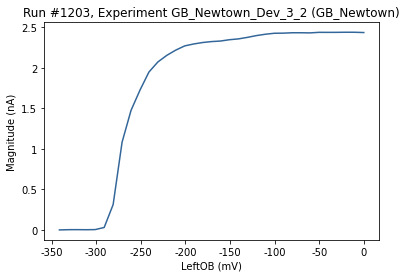

In [10]:
plot_by_id(ds.qc_run_id)

... or with nanotunes plotting function, which plots the normalized data.

(array([[<AxesSubplot:title={'center':'aaaaaaaa-0000-0000-0000-016c59f8305c'}, xlabel='LeftOB [V]', ylabel='transport [A]'>]],
       dtype=object),
 [[...]])

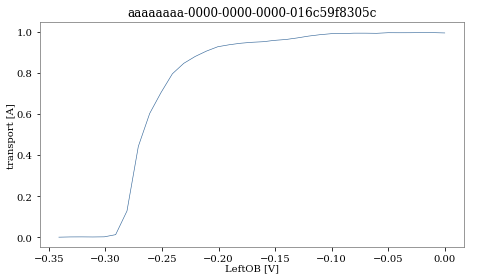

In [11]:
plot_dataset(1203, db_pinchoff, db_folder=nt_root)